In [ ]:
import zipfile
import os

# Unzip the uploaded images zip file
zip_file = 'images.zip'  # Replace with the actual name of the uploaded zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/images_folder')  # Unzip to the folder 'images_folder'

print("Images unzipped successfully!")


Images unzipped successfully!


In [ ]:
import pandas as pd

# Load the CSV file
csv_file = 'descriptions.csv'  # Replace with the actual name of your CSV file
df = pd.read_csv(csv_file)

# Display the first few rows of the CSV file
print(df.head())


    image_id gender    age    headshape           hair  hair_type  hair_color  \
0  00388.jpg   male  young   round head            NaN        NaN  black hair   
1  03662.jpg  woman  young    oval head            NaN  wavy hair  black hair   
2  02254.jpg  woman  young    oval head  receding hair        NaN         NaN   
3  03680.jpg    man  young  square head  receding hair        NaN  black hair   
4  02363.jpg    man   aged    oval head            NaN        NaN  brown hair   

  forehead_occlusion    eyebrow_size     eyebrow_shape  ...  mustache  beard  \
0                NaN   thick eyebrow    angled eyebrow  ...       NaN  beard   
1                NaN   thick eyebrow    angled eyebrow  ...       NaN    NaN   
2                NaN    thin eyebrow    angled eyebrow  ...       NaN    NaN   
3                NaN  normal eyebrow  straight eyebrow  ...  mustache  beard   
4                NaN  normal eyebrow  straight eyebrow  ...       NaN  beard   

   goatee sideburns          mak

In [ ]:
import os

# List directories and files in the base directory
base_directory = '/content/images_folder'
print("Contents of images_folder:", os.listdir(base_directory))


Contents of images_folder: ['images']


In [ ]:
from PIL import Image
import numpy as np
import os

def preprocess_images(image_folder):
    processed_images = []
    for image_file in os.listdir(image_folder):
        img_path = os.path.join(image_folder, image_file)
        if os.path.isfile(img_path):  # Ensure it's a file, not a directory
            img = Image.open(img_path).resize((64, 64))  # Resize to 64x64 or another size
            img = np.array(img) / 127.5 - 1  # Normalize to [-1, 1]
            processed_images.append(img)
    return np.array(processed_images)

# Path to the images subdirectory
images_directory = '/content/images_folder/images'
images = preprocess_images(images_directory)
print(f"Preprocessed {len(images)} images")


Preprocessed 1992 images


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('descriptions.csv')

# Display column names
print("Column names in the CSV file:", df.columns)


Column names in the CSV file: Index(['image_id', 'gender', 'age', 'headshape', 'hair', 'hair_type',
       'hair_color', 'forehead_occlusion', 'eyebrow_size', 'eyebrow_shape',
       'eyes_color', 'eyes_size', 'eyes_shape', 'bags_under_eyes',
       'narrow_eyes', 'eye_makeup', 'eyes_occlusion', 'nose_size', 'lips_size',
       'lipstick', 'mouth_open', 'chin_shape', 'mustache', 'beard', 'goatee',
       'sideburns', 'makeup', 'skin', 'expression', 'smile', 'glasses', 'hat'],
      dtype='object')


In [ ]:
# Create a description column by concatenating relevant fields
df['description'] = df[['gender', 'age', 'headshape', 'hair_color']].fillna('').agg(' '.join, axis=1)


In [ ]:
# Display the first few rows to verify
print(df[['image_id', 'description']].head())


    image_id                       description
0  00388.jpg  male young round head black hair
1  03662.jpg  woman young oval head black hair
2  02254.jpg            woman young oval head 
3  03680.jpg  man young square head black hair
4  02363.jpg     man aged oval head brown hair


In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('/content/descriptions.csv')

# Ensure descriptions and images are aligned
print(f"Number of descriptions: {len(df)}")
print(f"Number of images: {len(images)}")

# Remove the last row if there's one extra description
if len(df) > len(images):
    df = df.iloc[:-1]
    print("Trimmed the extra description.")

# Verify
print(f"Adjusted number of descriptions: {len(df)}")
print(f"Number of images: {len(images)}")

# Save the adjusted dataset if needed
df.to_csv('/content/adjusted_descriptions.csv', index=False)


Number of descriptions: 1993
Number of images: 1992
Trimmed the extra description.
Adjusted number of descriptions: 1992
Number of images: 1992


In [ ]:
# Load the CSV file to check column names
df = pd.read_csv('/content/adjusted_descriptions.csv')

# Display column names
print(df.columns)


Index(['image_id', 'gender', 'age', 'headshape', 'hair', 'hair_type',
       'hair_color', 'forehead_occlusion', 'eyebrow_size', 'eyebrow_shape',
       'eyes_color', 'eyes_size', 'eyes_shape', 'bags_under_eyes',
       'narrow_eyes', 'eye_makeup', 'eyes_occlusion', 'nose_size', 'lips_size',
       'lipstick', 'mouth_open', 'chin_shape', 'mustache', 'beard', 'goatee',
       'sideburns', 'makeup', 'skin', 'expression', 'smile', 'glasses', 'hat'],
      dtype='object')


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Load the adjusted descriptions CSV file
df = pd.read_csv('/content/adjusted_descriptions.csv')

# Create a description column by concatenating relevant fields
df['description'] = df[['gender', 'age', 'headshape', 'hair_color']].fillna('').agg(' '.join, axis=1)

# Combine descriptions into a single list
text_descriptions = df['description'].tolist()

# Tokenize text descriptions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_descriptions)
sequences = tokenizer.texts_to_sequences(text_descriptions)

# Pad sequences to ensure consistent input size
max_seq_length = max(len(seq) for seq in sequences)  # Or set a fixed length
text_data = pad_sequences(sequences, maxlen=max_seq_length)

print(f"Text data shape: {text_data.shape}")


Text data shape: (1992, 6)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, Concatenate

# Define the generator model
def build_generator():
    input_noise = Input(shape=(100,))
    input_text = Input(shape=(6,))
    x = Concatenate()([input_noise, input_text])
    x = Dense(128 * 32 * 32)(x)
    x = LeakyReLU()(x)
    x = Reshape((32, 32, 128))(x)
    x = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(3, kernel_size=3, activation='tanh', padding='same')(x)
    model = Model([input_noise, input_text], x)
    return model

# Define the discriminator model
def build_discriminator():
    input_image = Input(shape=(128, 128, 3))
    x = Conv2D(64, kernel_size=3, strides=2, padding='same')(input_image)
    x = LeakyReLU()(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(input_image, x)
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    input_noise = Input(shape=(100,))
    input_text = Input(shape=(6,))
    generated_image = generator([input_noise, input_text])
    validity = discriminator(generated_image)
    model = Model([input_noise, input_text], validity)
    return model

# Load and preprocess images
def load_images_from_folder(folder_path, target_size=(128, 128)):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    images = []
    for file_name in image_files:
        file_path = os.path.join(folder_path, file_name)
        img = load_img(file_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = (img_array - 127.5) / 127.5  # Normalize to [-1, 1]
        images.append(img_array)
    return np.array(images)

# Example path to the image folder
image_folder_path = '/content/images_folder/images'
image_data = load_images_from_folder(image_folder_path)

# Prepare text data
text_data = np.random.randn(image_data.shape[0], 6)  # Replace with actual text features if available

# Build and compile the GAN
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Train GAN
def train_gan(generator, discriminator, gan, epochs, batch_size, text_data, image_data):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, image_data.shape[0], half_batch)
        real_images = image_data[idx]
        real_labels = np.ones((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)

        noise = np.random.randn(half_batch, 100)
        text = np.random.randn(half_batch, text_data.shape[1])
        fake_images = generator.predict([noise, text])
        fake_labels = np.zeros((half_batch, 1))
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        if isinstance(d_loss_real, list):
            d_loss_real = np.mean(d_loss_real)
        if isinstance(d_loss_fake, list):
            d_loss_fake = np.mean(d_loss_fake)

        d_loss = 0.5 * (d_loss_real + d_loss_fake)

        # Train Generator
        noise = np.random.randn(batch_size, 100)
        text = np.random.randn(batch_size, text_data.shape[1])
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch([noise, text], valid_labels)

        if isinstance(g_loss, list):
            g_loss = np.mean(g_loss)

        # Print the progress
        print(f"{epoch}/{epochs} [D loss: {d_loss:.4f}] [G loss: {g_loss:.4f}]")

# Example call to the training function with reduced epochs
train_gan(generator, discriminator, gan, epochs=100, batch_size=64, text_data=text_data, image_data=image_data)

# Save models after training
generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')
gan.save('gan_model.keras')

# Generate images
noise = np.random.randn(10, 100)
text = np.random.randn(10, text_data.shape[1])
generated_images = generator.predict([noise, text])


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
0/100 [D loss: 0.7819] [G loss: 0.7519]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/100 [D loss: 0.7603] [G loss: 0.7510]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/100 [D loss: 0.7506] [G loss: 0.7457]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/100 [D loss: 0.7510] [G loss: 0.7475]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/100 [D loss: 0.7474] [G loss: 0.7449]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/100 [D loss: 0.7450] [G loss: 0.7432]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/100 [D loss: 0.7482] [G loss: 0.7467]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/100 [D loss: 0.7491] [G loss: 0.7479]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
8/100 [D loss: 0.7517] [G loss: 0.7506]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/100 [D loss: 0.7517] [G loss: 0.7508]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10/100 [D loss: 0.7550] [G loss: 0.7543]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
11/100 [D loss: 0.7554] [G loss: 0.7548]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
12/100 [D loss: 0.7569] [G loss: 0.7565]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/100 [D loss: 0.7588] [G loss: 0.7585]
1/1 ━━━━━━━━━━━━━━━━

In [ ]:
generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')
gan.save('gan_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

generator = load_model('generator_model.keras')
discriminator = load_model('discriminator_model.keras')
gan = load_model('gan_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


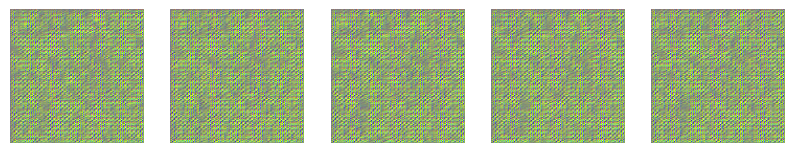

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the latent dimension size (e.g., 100)
latent_dim = 100

# Number of images to generate
num_images = 5

# Generate random noise and text vectors
noise = np.random.randn(num_images, latent_dim)
text = np.random.randn(num_images, text_data.shape[1])  # Adjust based on text features

# Generate images using the trained generator
generated_images = generator.predict([noise, text])

# Rescale images to [0, 1] for visualization
generated_images = (generated_images + 1) / 2.0

# Display generated images
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.show()
